Abbiamo 10 dati e 3 features


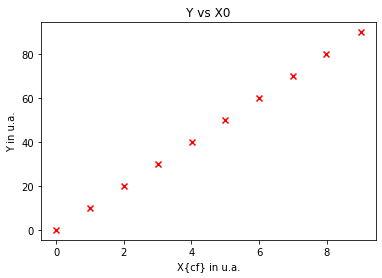

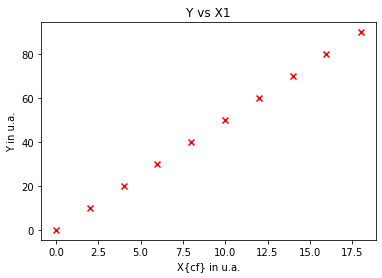

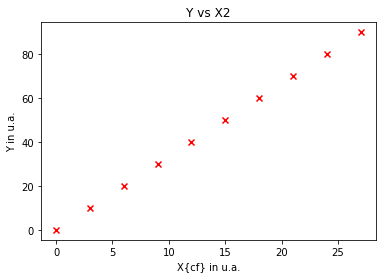

Iterazione    0: Costo    910.3
Iterazione 10000: Costo 0.0003964
Iterazione 20000: Costo 0.0003932
Iterazione 30000: Costo 0.0003932
Iterazione 40000: Costo 0.0003931
Iterazione 50000: Costo 0.0003931
Iterazione 60000: Costo 0.000393
Iterazione 70000: Costo 0.000393
Iterazione 80000: Costo 0.0003929
Iterazione 90000: Costo 0.0003929
La legge è Y = 0.7178 x0 + 1.425 x1 + 2.144 x2 + -0.01311 con costo 0.0003928


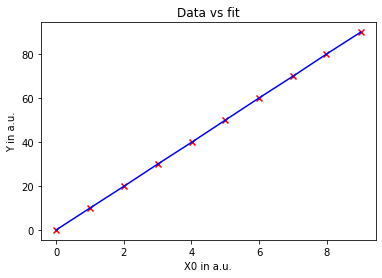

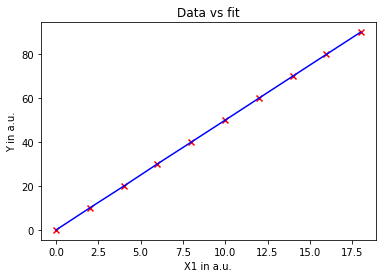

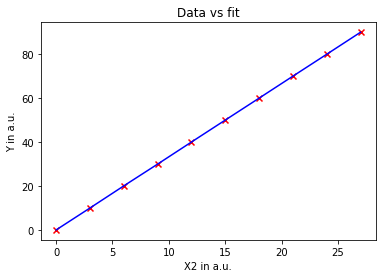

In [185]:
#librerie
import numpy as np
import matplotlib.pyplot as plt
#from utils import *
import copy
import math
%matplotlib inline

#prendo i dati
n_feat = 3
n_data = 10
x_tr = np.zeros((n_data,n_feat))
y_tr = np.zeros((n_data,))
cd = 0
cf = 0
for cd in range(n_data):
    for cf in range(n_feat):
        x_tr[cd,cf] = 1*cd*(1+cf) + 0.01*np.random.standard_normal(size=(1,))
        y_tr[cd] = 1*cd*(n_feat+2)*(n_feat+1)*0.5 + 0.01*np.random.standard_normal(size=(1,))

#prendi dimensioni dati
print("Abbiamo",n_data,"dati e",n_feat,"features")
alpha = 5*10**-4
epoch = 100000

#preprocessing


#plot dati ingresso
cf = 0
for cf in range(n_feat):
    plt.scatter(x_tr[:,cf],y_tr,marker='x',c='r')
    plt.title(f"Y vs X{cf}")
    plt.xlabel("X{cf} in u.a.")
    plt.ylabel("Y in u.a.")
    plt.show()

#calcolo costo
def comp_cost(x,y,w,b):
    nd, nf = x.shape
    cost = 0
    cd = 0
    for cd in range(nd):
            cost = cost + (np.dot(w,x_tr[cd]) + b - y[cd])**2
    cost = cost/(2*nd)
    return cost

#calcolo gradiente
def comp_gradient(x,y,w,b):
    nd, nf = x.shape
    djdw = np.zeros(nf)
    djdb = 0
    cd = 0
    cf = 0
    for cf in range(nf):
        for cd in range(nd):
            djdw[cf] = djdw[cf] + (np.dot(w,x[cd]) + b - y[cd])*x[cd,cf]
            djdb = djdb + np.dot(w,x[cd]) + b - y[cd]
    for cf in range(nf):
        djdw[cf] = djdw[cf]/nd
    djdb = djdb/nd
    return djdw,djdb

#descent gradient
def grad_des(x,y,w_in,b_in,alpha,epoch):
    nd = x.shape[0]
    nf = x.shape[1]
    J_hist = []
    w_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    i = 0
    for i in range(epoch):
        djdw,djdb = comp_gradient(x,y,w,b)
        for cf in range(nf): 
            w[cf] = w[cf] - alpha*djdw[cf]
        b = b - alpha*djdb
        if i < 10**5:
            costo = comp_cost(x,y,w,b)
            J_hist.append(costo)
            if i%math.ceil(epoch/10) == 0:
                w_hist.append(w)
                print(f"Iterazione {i:4}: Costo {float(J_hist[-1]):8.4g}")
    return w,b

#applico ML
pred = np.zeros(n_data)
cf = 0
w_in = np.zeros(n_feat)
b_in = 0
w,b = grad_des(x_tr,y_tr,w_in,b_in,alpha,epoch)
print(f"La legge è Y =",end=" ")
for cf in range(n_feat):
    print(f"{float(w[cf]):.4} x{cf} +",end=" ")
print(f"{float(b):.4} con costo {float(comp_cost(x_tr,y_tr,w,b)):8.4g}")

#vedo predizioni
cf = 0
cd = 0
y_pred = np.zeros(n_data)
for cd in range(n_data):
        y_pred[cd] = np.dot(w,x_tr[cd]) + b
cf = 0
for cf in range (n_feat):
    plt.plot(x_tr[:,cf],y_pred[:],c='b')
    plt.scatter(x_tr[:,cf],y_tr,c='r',marker='x')
    plt.title("Data vs fit")
    plt.xlabel(f"X{cf} in a.u.")
    plt.ylabel("Y in a.u.")
    plt.show()
    
    